https://www.kaggle.com/zaurbegiev/my-dataset


In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
!pip install pycaret


     |████████████████████████████████| 256kB 6.9MB/s 
     |████████████████████████████████| 66.3MB 58kB/s 
     |████████████████████████████████| 276kB 69.5MB/s 
     |████████████████████████████████| 13.9MB 30.9MB/s 
     |████████████████████████████████| 266kB 68.4MB/s 
     |████████████████████████████████| 174kB 67.9MB/s 
     |████████████████████████████████| 1.6MB 61.2MB/s 
     |████████████████████████████████| 157.5MB 46kB/s 
     |████████████████████████████████| 1.8MB 52.8MB/s 
     |████████████████████████████████| 102kB 12.7MB/s 
     |████████████████████████████████| 6.8MB 61.0MB/s 
     |████████████████████████████████| 337kB 69.2MB/s 
     |████████████████████████████████| 1.1MB 69.8MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 153kB 69.0MB/s 
     |████████████████████████████████| 163kB 67.2MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 71kB 9.4MB/s

In [7]:

import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## load dataset from google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
dataset=pd.read_csv("/content/sample_data/lc_cleaned_combined.csv") # dataset location on Drive


In [9]:
dataset.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs
0,0,11575.0,11575.0,11575.0,36 months,7.35,A,Solutions Architect,6 years,OWN,153000.0,Jun-2017,Fully Paid,credit_card,CA,16.99,0.0
1,1,7200.0,7200.0,7200.0,36 months,24.85,E,Pse,2 years,RENT,50000.0,Jun-2017,Fully Paid,debt_consolidation,WA,6.07,0.0
2,2,7500.0,7500.0,7500.0,36 months,7.35,A,Associate Director,7 years,MORTGAGE,110000.0,Jun-2017,Fully Paid,debt_consolidation,TX,13.12,0.0
3,3,10000.0,10000.0,10000.0,60 months,16.02,C,Biller,7 years,RENT,51979.0,Jun-2017,Fully Paid,debt_consolidation,CA,10.11,0.0
4,4,14000.0,14000.0,14000.0,36 months,16.02,C,cdl driver,7 years,MORTGAGE,75000.0,Jun-2017,Fully Paid,debt_consolidation,MA,10.86,1.0


In [ ]:
!pip install pandas-profiling

In [ ]:

from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title='Pandas Profiling Report')


In [ ]:
profile

In [ ]:
profile.to_file('lc_data_profile.html')

In [10]:
#check the shape of data
dataset.shape

(422141, 17)

In [11]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True,inplace=True)
data_unseen.reset_index(drop=True,inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (379927, 17)
Unseen Data For Predictions: (42214, 17)


In [12]:
data.columns

Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs'],
      dtype='object')

In [13]:
#for classification purpose
from pycaret.classification import *
#?setup



In [16]:
exp_clf101 = setup(data = data, target = 'loan_status', session_id=123,train_size= 0.8, ignore_features=['Unnamed: 0', 'funded_amnt', 'funded_amnt_inv', 
       'emp_title', 
       'issue_d',   'addr_state', 'dti',
       'delinq_2yrs'])
                   #numeric_features=['pub_rec'],  
##exclude unimporatant predictors 

,Description,Value
0,session_id,123
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"Charged Off: 0, Fully Paid: 1"
4,Original Data,"(379927, 17)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1 and Kappa accross the folds (10 by default) of all the available models in the model library.

In [ ]:
?compare_models
#ignore xgboost model for an error issue with column name

# k=5 Cross-validation for speedy output for now, ignore 'xgboost' model becuase we have "["or "]" or "," in emp_year

In [17]:
compare_models(exclude=["xgboost"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8038,0.7066,0.9912,0.8077,0.8901,0.0587,0.1205,0.622
catboost,CatBoost Classifier,0.8037,0.7115,0.9852,0.8106,0.8894,0.0830,0.1403,27.242
gbc,Gradient Boosting Classifier,0.8035,0.7020,0.9928,0.8066,0.8901,0.0490,0.1100,6.435
ada,Ada Boost Classifier,0.8026,0.6988,0.9923,0.8062,0.8896,0.0446,0.1002,1.620
ridge,Ridge Classifier,0.8014,0.0000,0.9977,0.8025,0.8895,0.0101,0.0423,0.072
lr,Logistic Regression,0.8013,0.5770,0.9997,0.8015,0.8897,-0.0001,-0.0006,0.381
lda,Linear Discriminant Analysis,0.7997,0.6893,0.9819,0.8090,0.8871,0.0681,0.1126,0.573
nb,Naive Bayes,0.7967,0.6729,0.9835,0.8057,0.8858,0.0390,0.0709,0.212
rf,Random Forest Classifier,0.7832,0.6520,0.9409,0.8166,0.8743,0.1137,0.1312,3.935
knn,K Neighbors Classifier,0.7721,0.5808,0.9331,0.8111,0.8678,0.0717,0.0823,1.054


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Two simple words of code ***(not even a line)*** have created over 15 models using 10 fold stratified cross validation and evaluated the 6 most commonly used classification metrics (Accuracy, AUC, Recall, Precision, F1, Kappa). The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the `sort` parameter. For example `compare_models(sort = 'Recall')` will sort the grid by Recall instead of Accuracy. If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time.

# 8.0 Create a Model

In [18]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7828,0.6486,0.9409,0.8162,0.8741,0.1108,0.1281
1,0.7831,0.6494,0.9412,0.8163,0.8743,0.1119,0.1294
2,0.7848,0.6509,0.9429,0.8169,0.8754,0.1166,0.1353
3,0.7834,0.6560,0.9394,0.8176,0.8743,0.1202,0.1375
4,0.7822,0.6490,0.9408,0.8157,0.8738,0.1072,0.1242
5,0.7818,0.6544,0.9402,0.8157,0.8735,0.1073,0.1239
6,0.7833,0.6530,0.9405,0.8169,0.8744,0.1158,0.1333
7,0.7832,0.6519,0.9420,0.8159,0.8744,0.1095,0.1272
8,0.7839,0.6554,0.9401,0.8176,0.8746,0.1207,0.1384
9,0.7839,0.6515,0.9413,0.8170,0.8747,0.1168,0.1347


In [19]:
lr=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8015,0.5725,0.9999,0.8015,0.8898,0.0001,0.0034
1,0.8014,0.5799,0.9998,0.8016,0.8897,0.0001,0.0021
2,0.8013,0.5774,0.9996,0.8015,0.8897,-0.0001,-0.0008
3,0.8015,0.5778,0.9999,0.8015,0.8898,0.0003,0.0065
4,0.8014,0.5707,0.9998,0.8015,0.8897,0.0002,0.0033
5,0.8013,0.5723,0.9997,0.8015,0.8897,-0.0003,-0.0038
6,0.8014,0.5778,0.9998,0.8015,0.8897,0.0001,0.0021
7,0.8012,0.5856,0.9997,0.8015,0.8897,-0.0005,-0.0081
8,0.8011,0.5789,0.9995,0.8014,0.8896,-0.0008,-0.0099
9,0.8014,0.5769,0.9998,0.8015,0.8897,-0.0001,-0.0011


### 8.1 confirm Classifier based on last session

In [20]:
#apparently logistic regression is good enough
lr=create_model('lr')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8015,0.5725,0.9999,0.8015,0.8898,0.0001,0.0034
1,0.8014,0.5799,0.9998,0.8016,0.8897,0.0001,0.0021
2,0.8013,0.5774,0.9996,0.8015,0.8897,-0.0001,-0.0008
3,0.8015,0.5778,0.9999,0.8015,0.8898,0.0003,0.0065
4,0.8014,0.5707,0.9998,0.8015,0.8897,0.0002,0.0033
5,0.8013,0.5723,0.9997,0.8015,0.8897,-0.0003,-0.0038
6,0.8014,0.5778,0.9998,0.8015,0.8897,0.0001,0.0021
7,0.8012,0.5856,0.9997,0.8015,0.8897,-0.0005,-0.0081
8,0.8011,0.5789,0.9995,0.8014,0.8896,-0.0008,-0.0099
9,0.8014,0.5769,0.9998,0.8015,0.8897,-0.0001,-0.0011


In [21]:
#random forest
rf=create_model('rf')
#SVM


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7828,0.6486,0.9409,0.8162,0.8741,0.1108,0.1281
1,0.7831,0.6495,0.9412,0.8163,0.8743,0.1119,0.1294
2,0.7848,0.6509,0.9429,0.8169,0.8754,0.1166,0.1353
3,0.7834,0.6560,0.9394,0.8176,0.8743,0.1202,0.1375
4,0.7822,0.6490,0.9408,0.8157,0.8738,0.1072,0.1242
5,0.7818,0.6544,0.9402,0.8157,0.8735,0.1073,0.1239
6,0.7833,0.6530,0.9405,0.8169,0.8744,0.1158,0.1333
7,0.7832,0.6519,0.9420,0.8159,0.8744,0.1095,0.1272
8,0.7839,0.6554,0.9401,0.8176,0.8746,0.1207,0.1384
9,0.7839,0.6515,0.9413,0.8170,0.8747,0.1168,0.1347


In [ ]:
?create_model

In [22]:
#trained model object is stored in the variable 'dt'. 
print(rf)
print(lr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# 9.0 Tune a Model

When a model is created using the `create_model()` function it uses the default hyperparameters. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold. <br/>
<br/>
**Note:** `tune_model()` does not take a trained model object as an input. It instead requires a model name to be passed as an abbreviated string similar to how it is passed in `create_model()`. All other functions in `pycaret.classification` require a trained model object as an argument.

### 9.1 Tune model

In [23]:
tuned_lr=tune_model(lr,optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8015,0.5725,0.9999,0.8015,0.8898,0.0001,0.0034
1,0.8014,0.5799,0.9998,0.8016,0.8897,0.0001,0.0021
2,0.8013,0.5774,0.9996,0.8015,0.8897,-0.0001,-0.0008
3,0.8015,0.5778,0.9999,0.8015,0.8898,0.0003,0.0065
4,0.8014,0.5707,0.9998,0.8015,0.8897,0.0002,0.0033
5,0.8013,0.5723,0.9997,0.8015,0.8897,-0.0003,-0.0038
6,0.8014,0.5778,0.9998,0.8015,0.8897,0.0001,0.0021
7,0.8012,0.5856,0.9997,0.8015,0.8897,-0.0005,-0.0081
8,0.8011,0.5789,0.9995,0.8014,0.8896,-0.0008,-0.0099
9,0.8014,0.5769,0.9998,0.8015,0.8897,-0.0001,-0.0011


In [24]:
tuned_rf = tune_model(rf,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0
1,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0
2,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0
3,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0
4,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0
5,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0
6,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0
7,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0
8,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0
9,0.8015,0.5,1.0,0.8015,0.8898,0.0,0.0


In [25]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_rf)
print(tuned_lr)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
LogisticRegression(C=4.432, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available, please see the `plot_model()` docstring for the list of available plots.

### 10.1 AUC Plot

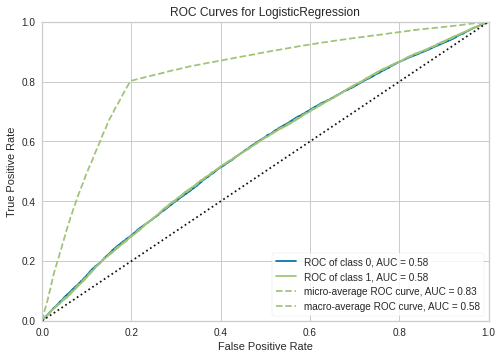

In [26]:
plot_model(tuned_lr)

In [ ]:
#?plot_model
plot_model(tuned_lr, plot = 'feature')

In [27]:
plot_model(tuned_rf, plot = 'auc')

NameError: ignored

### 10.2 Precision-Recall Curve

In [ ]:
plot_model(tuned_dt, plot = 'pr')

### 10.3 Feature Importance Plot

### 10.4 Confusion Matrix

In [ ]:
plot_model(tuned_dt, plot = 'confusion_matrix')


In [ ]:
import sklearn


In [ ]:
?tuned_dt


In [ ]:
sklearn.tree.plot_tree(tuned_dt)

In [ ]:
plot_model(tuned_lr,plot="confusion_matrix")

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [ ]:
evaluate_model(tuned_lr)

# 11.0 Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (6,841 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the `tuned_lr` variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [ ]:
predict_model(tuned_lr);

In [ ]:
predict_model(tuned_rf);

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (20% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

# 12.0 Finalize Model for Deployment

In [29]:
final_lr = finalize_model(tuned_lr)
final_rf =finalize_model(tuned_rf)

In [ ]:
#Final Random Forest model parameters for deployment
print(final_lr)

In [30]:
predict_model(final_lr)
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8018,0.5771,0.9998,0.802,0.89,-0.0002,-0.0043


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.802,0.5,1.0,0.802,0.8901,0.0,0.0


,loan_amnt,int_rate,annual_inc,term_ 36 months,term_ 60 months,term_36 months,term_60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_not_available,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_status,Label,Score
0,3500.0,9.49,38000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,Fully Paid,0.8016
1,9450.0,17.27,28000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,Fully Paid,0.8016
2,20000.0,13.92,84996.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,Fully Paid,0.8016
3,6000.0,12.21,40000.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,Fully Paid,0.8016
4,3975.0,21.18,25000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Charged Off,Fully Paid,0.8016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75981,30000.0,15.61,124833.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,Fully Paid,0.8016
75982,3350.0,13.59,32000.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,Fully Paid,0.8016
75983,7000.0,14.65,60000.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,Fully Paid,0.8016
75984,25000.0,15.99,142000.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fully Paid,Fully Paid,0.8016


Notice how the AUC in `final_rf` has increased to **`0.8189`** from **`0.7538`**, even though the model is the same. This is because the `final_rf` variable has been trained on the complete dataset including the test/hold-out set.

# 13.0 Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 5% (1200 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [31]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,Label,Score
0,379927,4000.0,4000.0,4000.0,36 months,23.43,F,Manager,10+ years,MORTGAGE,100000.0,Mar-2014,Fully Paid,major_purchase,TX,11.58,0.0,Fully Paid,0.8789
1,379928,30000.0,30000.0,30000.0,60 months,20.49,E,Lead Pastor,10+ years,MORTGAGE,70000.0,Mar-2014,Fully Paid,major_purchase,GA,1.95,0.0,Fully Paid,0.7340
2,379929,19200.0,19200.0,19200.0,36 months,11.99,B,Associate Clinical Project Manager,7 years,MORTGAGE,92000.0,Mar-2014,Charged Off,debt_consolidation,NC,29.06,0.0,Fully Paid,0.8335
3,379930,35000.0,35000.0,35000.0,60 months,25.89,G,financial consultant,5 years,OWN,150000.0,Mar-2014,Fully Paid,debt_consolidation,PA,19.31,0.0,Fully Paid,0.9293
4,379931,20000.0,20000.0,20000.0,36 months,11.99,B,SUPV INFORMATION TECHNOLOGY,9 years,MORTGAGE,122443.0,Mar-2014,Fully Paid,credit_card,OK,12.64,2.0,Fully Paid,0.9020


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

# 14.0 Saving the model

We have now finished the experiment by finalizing the `tuned_rf` model which is now stored in `final_rf` variable. We have also used the model stored in `final_rf` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [32]:
save_model(final_lr,'Final logistic classification-heroku_version')
save_model(final_rf,'Final random forest-heroku_version')

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Unnamed: 0',
                                                        'funded_amnt',
                                                        'funded_amnt_inv',
                                                        'emp_title', 'issue_d',
                                                        'addr_state', 'dti',
                                                        'delinq_2yrs'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='loan_status', time_features=[])),
                 ('imputer',
                  Simple_Imputer(c...
                  RandomForestClassifier(bootstra

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [33]:
saved_final_lr = load_model('Final logistic classification- 1 cleaned data')

Transformation Pipeline and Model Successfully Loaded


FileNotFoundError: ignored

Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [ ]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)
new_prediction.head

In [ ]:
dfp=pd.DataFrame(new_prediction)
dfp.to_csv('prediction-Logistic Regression-1st clean data.csv')

Notice that the results of `unseen_predictions` and `new_prediction` are identical.

This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model()`, `tune_model()`, `compare_models()`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries.

We have only covered the basics of `pycaret.classification`. In following tutorials we will go deeper into advanced pre-processing, ensembling, generalized stacking and other techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist.

See you at the next tutorial. Follow the link to __[Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/Tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__

This is a preliminary run on model comparison
We can do the same in R and compare accuracy